<a href="https://colab.research.google.com/github/subhashini-talupula/Intelligent-Recipe-Finder-and-Meal-Planner-Platform/blob/main/dmt_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DMT/climate_change_dataset.csv")
df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Create binary target: High Temperature = 1, Low = 0
df["Temp_High"] = (df["Avg Temperature (°C)"] > df["Avg Temperature (°C)"].median()).astype(int)

# Feature engineering (adds useful predictors)
df["Temp_CO2_Ratio"] = df["Avg Temperature (°C)"] / (df["CO2 Emissions (Tons/Capita)"] + 1e-6)
df["CO2_Change"] = df["CO2 Emissions (Tons/Capita)"].pct_change().fillna(0)
df["Combined_Index"] = df["Temp_CO2_Ratio"] * df["CO2_Change"]

# Drop non-numeric 'Country' column and target columns from features
X = df.drop(columns=["Avg Temperature (°C)", "Temp_High", "Country"])
y = df["Temp_High"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(" Preprocessing complete!")
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


 Preprocessing complete!
Training data shape: (800, 11)
Test data shape: (200, 11)


using decision tree

 Decision Tree Accuracy: 96.00%


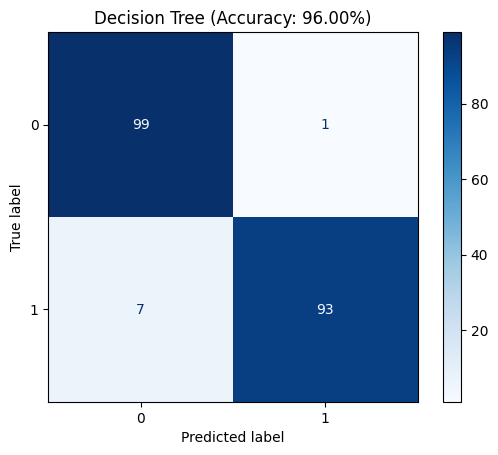

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth=8, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred) * 100
print(f" Decision Tree Accuracy: {acc_dt:.2f}%")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title(f"Decision Tree (Accuracy: {acc_dt:.2f}%)")
plt.show()


using naive bayes


 Naïve Bayes Accuracy: 55.00%


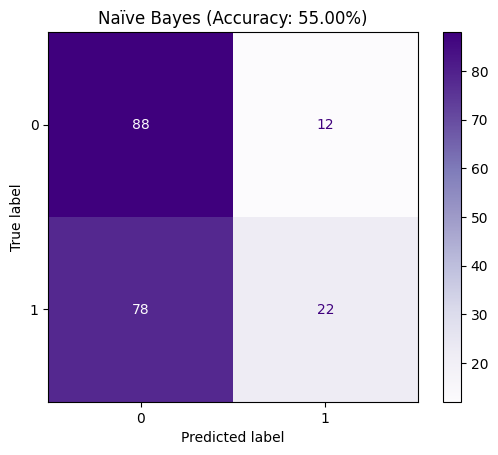

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred) * 100
print(f" Naïve Bayes Accuracy: {acc_nb:.2f}%")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Purples")
plt.title(f"Naïve Bayes (Accuracy: {acc_nb:.2f}%)")
plt.show()


using random forest

Random Forest Accuracy: 89.50%


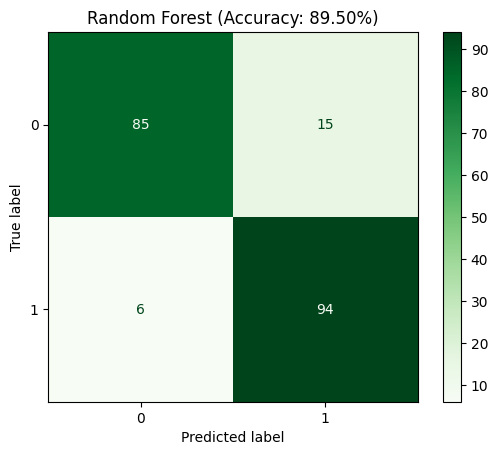

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest Accuracy: {acc_rf:.2f}%")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Greens")
plt.title(f"Random Forest (Accuracy: {acc_rf:.2f}%)")
plt.show()


using SVM

SVM Accuracy: 84.50%


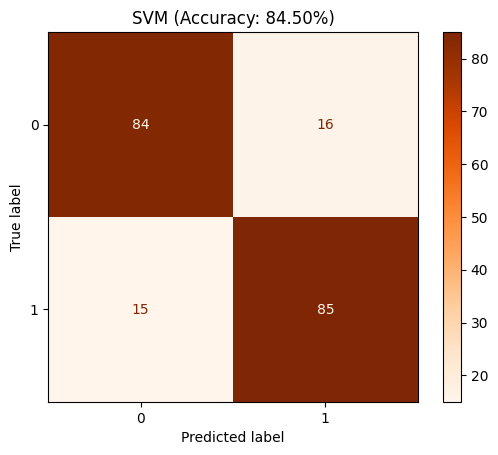

In [ ]:
from sklearn.svm import SVC

svm = SVC(C=10, gamma=0.01, kernel="rbf", probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred) * 100
print(f"SVM Accuracy: {acc_svm:.2f}%")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Oranges")
plt.title(f"SVM (Accuracy: {acc_svm:.2f}%)")
plt.show()


using XG Boost

XGBoost Accuracy: 96.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       100
           1       0.99      0.94      0.96       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



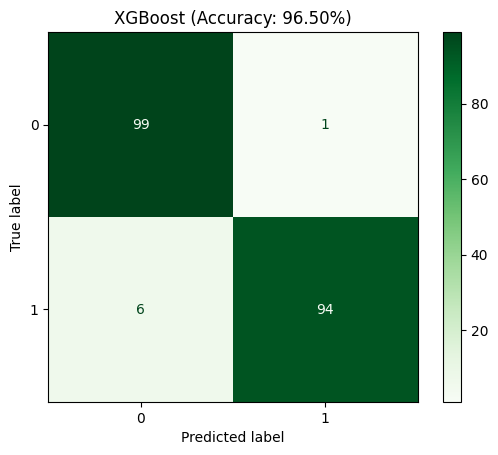

In [ ]:

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# XGBoost Model
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred) * 100
print(f"XGBoost Accuracy: {acc_xgb:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Greens")
plt.title(f"XGBoost (Accuracy: {acc_xgb:.2f}%)")
plt.show()



using stacking and voting

Stacking Classifier Accuracy: 96.00%


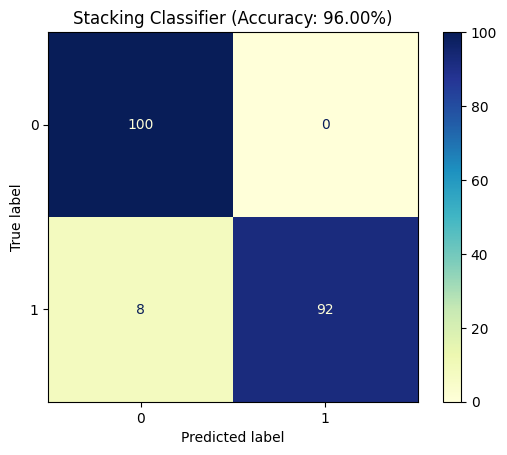

Voting Classifier Accuracy: 96.50%


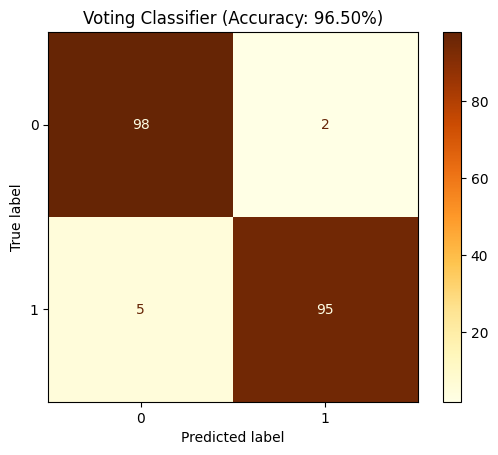

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

base_models = [
    ("dt", dt),
    ("nb", nb),
    ("rf", rf),
    ("svm", svm),
    ("xgb", xgb)
]

# Stacking
stack = StackingClassifier(
    estimators=base_models,
    final_estimator=RandomForestClassifier(n_estimators=200, random_state=42)
)
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack) * 100
print(f"Stacking Classifier Accuracy: {acc_stack:.2f}%")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stack)).plot(cmap="YlGnBu")
plt.title(f"Stacking Classifier (Accuracy: {acc_stack:.2f}%)")
plt.show()

# Voting
vote = VotingClassifier(estimators=base_models, voting="soft")
vote.fit(X_train, y_train)
y_pred_vote = vote.predict(X_test)
acc_vote = accuracy_score(y_test, y_pred_vote) * 100
print(f"Voting Classifier Accuracy: {acc_vote:.2f}%")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_vote)).plot(cmap="YlOrBr")
plt.title(f"Voting Classifier (Accuracy: {acc_vote:.2f}%)")
plt.show()


accuracy comparision

/tmp/ipython-input-2310012953.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


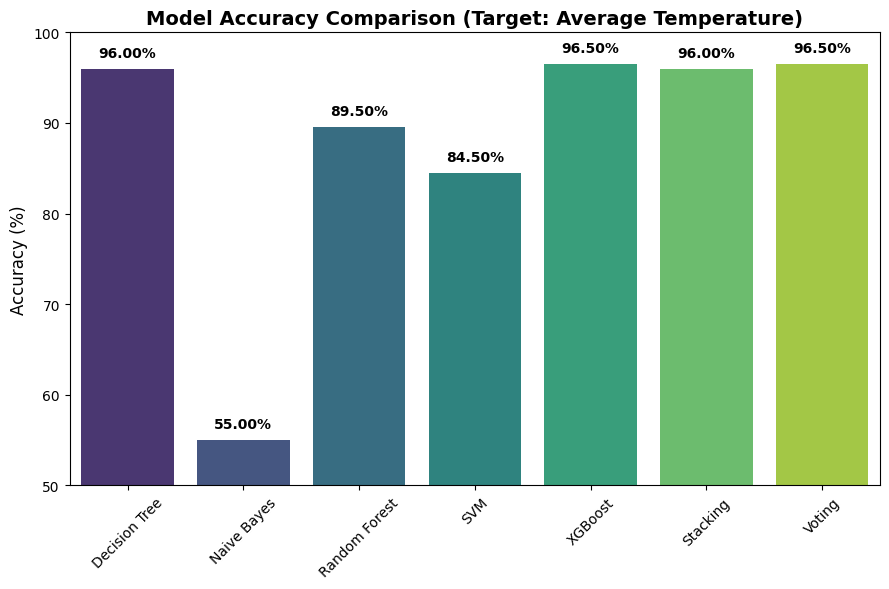

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

results = {
    "Decision Tree": acc_dt,
    "Naive Bayes": acc_nb,
    "Random Forest": acc_rf,
    "SVM": acc_svm,
    "XGBoost": acc_xgb,
    "Stacking": acc_stack,
    "Voting": acc_vote
}

plt.figure(figsize=(9,6))
bars = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")

plt.title("Model Accuracy Comparison (Target: Average Temperature)", fontsize=14, weight='bold')
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(50, 100)
plt.xticks(rotation=45, fontsize=10)

# Add accuracy values above each bar
for i, (model, acc) in enumerate(results.items()):
    bars.text(i, acc + 1, f"{acc:.2f}%", ha='center', va='bottom', fontsize=10, weight='bold', color='black')

plt.tight_layout()
plt.show()


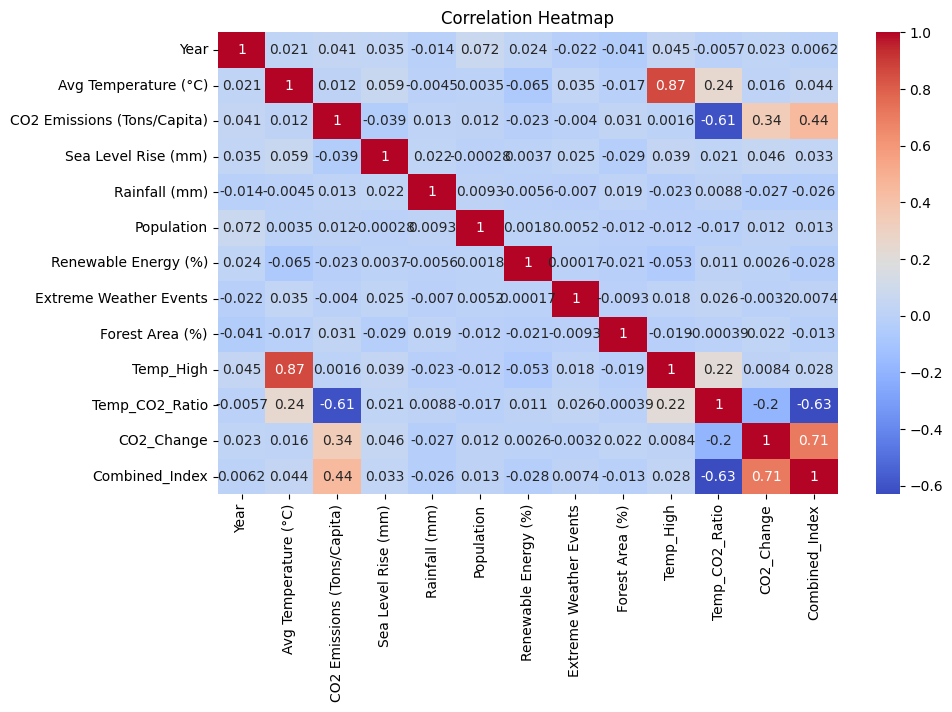

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Country']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()